<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [2]:
# Install dependencies
# !pip install "stable-baselines3[extra]" "gymnasium[classic_control]"

The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [1]:
import os
# libiomp5md.dll, but found libiomp5md.dll already initialized. PROBLEM with OpenMP runtime!
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"  # UNSAFE workaround, only used for experimentation.

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=0)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N, progress_bar=True)

Output()

# Visualize the result

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

1. SAC on HalfCheetah-v4 with RewardLogger

In [ ]:
# !pip install gymnasium[mujoco]

In [58]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback

In [59]:
class RewardLogger(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_timesteps = []
        self._current_ep_reward = 0.0

    def _on_step(self):
        reward = self.locals["rewards"][0]
        done = self.locals["dones"][0]
        truncated = self.locals.get("infos", [{}])[0].get("TimeLimit.truncated", False)

        self._current_ep_reward += reward

        if done or truncated:
            self.episode_rewards.append(self._current_ep_reward)
            self.episode_timesteps.append(self.num_timesteps)
            self._current_ep_reward = 0.0

        return True


In [ ]:
# env_id = "HalfCheetah-v4"
# env = gym.make(env_id)

# # Baseline SAC configuration (automatic entropy tuning)
# model = SAC(
#     "MlpPolicy",
#     env,
#     verbose=0,
#     ent_coef="auto",           # default automatic entropy tuning
#     tensorboard_log=None       # or "logs/sac_halfcheetah" if you want TB
# )

# reward_logger_auto = RewardLogger()

# total_timesteps = 1e4  # adjust depending on how long you can train

# model.learn(
#     total_timesteps=total_timesteps,
#     callback=reward_logger_auto,
#     progress_bar=True
# )

# env.close()





import os
import gymnasium as gym
from stable_baselines3 import SAC

env_id = "HalfCheetah-v4"
model_path = "sac_halfcheetah.zip"

env = gym.make(env_id)

# -----------------------------
# 1. Cargar modelo si existe
# -----------------------------
if os.path.exists(model_path):
    print("🔄 Modelo encontrado → Cargando modelo guardado...")
    model = SAC.load(model_path, env=env, verbose=0)
else:
    print("🆕 No se encontró modelo → Creando uno nuevo...")
    model = SAC(
        "MlpPolicy",
        env,
        verbose=0,
        ent_coef="auto",
        tensorboard_log=None
    )

# -----------------------------
# 2. Entrenar
# -----------------------------
reward_logger_auto = RewardLogger()

total_timesteps = int(1e6)
model.learn(
    total_timesteps=total_timesteps,
    callback=reward_logger_auto,
    progress_bar=True
)

# -----------------------------
# 3. Guardar modelo después de entrenar
# -----------------------------
print("💾 Guardando modelo...")
model.save(model_path)

env.close()
print("✅ Proceso completado.")





Output()

🔄 Modelo encontrado → Cargando modelo guardado...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

# env = gym.make("Pendulum-v1", render_mode="rgb_array")
env = gym.make("HalfCheetah-v4", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


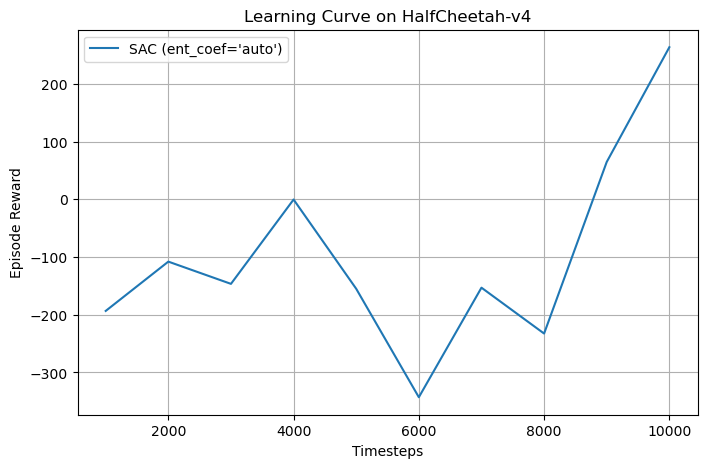

In [ ]:
def plot_learning_curve(timesteps, rewards, label=None):
    plt.figure(figsize=(8, 5))
    plt.plot(timesteps, rewards, label=label if label else "SAC")
    plt.xlabel("Timesteps")
    plt.ylabel("Episode Reward")
    if label:
        plt.legend()
    plt.grid(True)
    plt.title("Learning Curve on HalfCheetah-v4")
    plt.show()

plot_learning_curve(
    reward_logger_auto.episode_timesteps,
    reward_logger_auto.episode_rewards,
    label="SAC (ent_coef='auto')"
)


2. Comparing SAC to previous algorithm

Output()

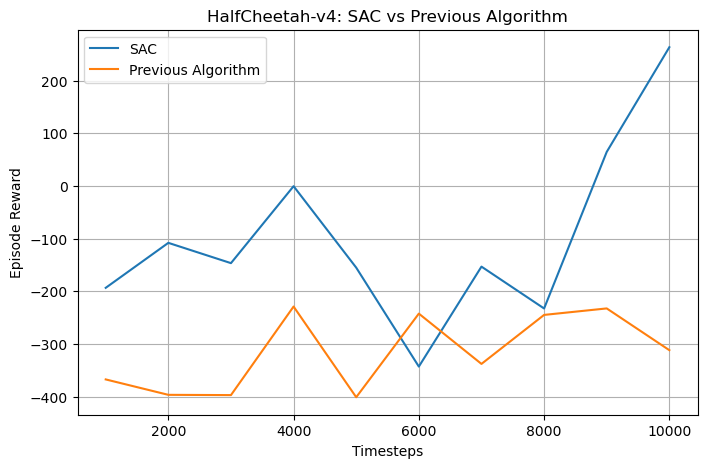

In [ ]:
from stable_baselines3 import PPO  # or TD3, DDPG, etc.

env_prev = gym.make(env_id)

prev_model = PPO(
    "MlpPolicy",
    env_prev,
    verbose=0
)

reward_logger_prev = RewardLogger()

prev_model.learn(
    total_timesteps=total_timesteps,
    callback=reward_logger_prev,
    progress_bar=True
)

env_prev.close()

# Plot both curves
plt.figure(figsize=(8, 5))
plt.plot(reward_logger_auto.episode_timesteps,
         reward_logger_auto.episode_rewards,
         label="SAC")
plt.plot(reward_logger_prev.episode_timesteps,
         reward_logger_prev.episode_rewards,
         label="Previous Algorithm")
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward")
plt.title("HalfCheetah-v4: SAC vs Previous Algorithm")
plt.legend()
plt.grid(True)
plt.show()


3. Experiments with entropy temperature

- ent_coef="auto" (default automatic tuning)
- fixed ent_coef values: e.g. 0.01, 0.1, 0.5
- optionally, target_entropy when ent_coef="auto"

In [ ]:
ent_configs = {
    "auto_default": dict(ent_coef="auto", target_entropy="auto"),
    "auto_low_entropy": dict(ent_coef="auto", target_entropy=-1.0),  # closer to deterministic
    "fixed_low": dict(ent_coef=0.01),   # lower entropy → less exploration
    "fixed_high": dict(ent_coef=0.5),   # higher entropy → more exploration
}

results = {}

for name, config in ent_configs.items():
    print(f"\n=== Training SAC with config: {name} ===")
    env = gym.make(env_id)

    model = SAC(
        "MlpPolicy",
        env,
        verbose=0,
        **config
    )

    logger = RewardLogger()
    model.learn(
        total_timesteps=total_timesteps,
        callback=logger,
        progress_bar=True
    )
    env.close()

    results[name] = {
        "timesteps": np.array(logger.episode_timesteps),
        "rewards": np.array(logger.episode_rewards),
    }


Output()


=== Training SAC with config: auto_default ===


Output()


=== Training SAC with config: auto_low_entropy ===


Output()


=== Training SAC with config: fixed_low ===


Output()


=== Training SAC with config: fixed_high ===


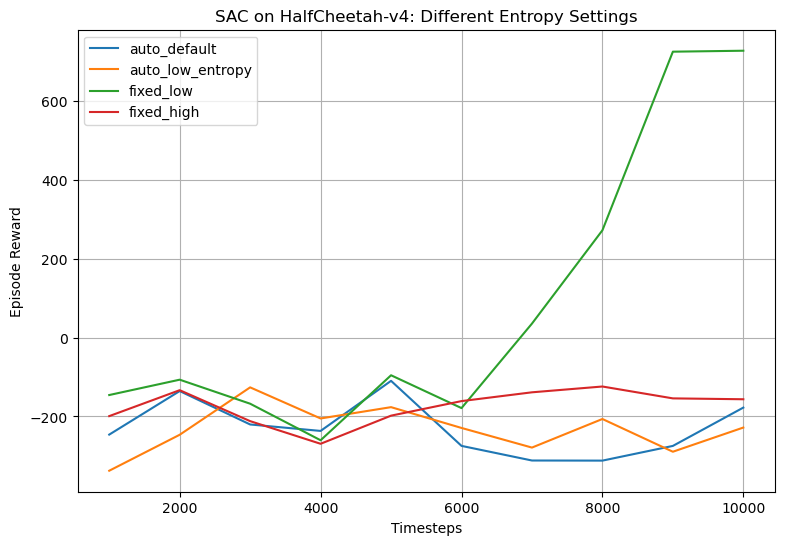

In [ ]:
plt.figure(figsize=(9, 6))
for name, data in results.items():
    plt.plot(data["timesteps"], data["rewards"], label=name)

plt.xlabel("Timesteps")
plt.ylabel("Episode Reward")
plt.title("SAC on HalfCheetah-v4: Different Entropy Settings")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("HalfCheetah-v4")
# env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=0)

# Train the agent with N time steps
N = 1e3
model.learn(total_timesteps=N, progress_bar=True)

c:\Users\edwar\miniconda3\envs\rl\lib\site-packages\gymnasium\envs\registration.py:512: DeprecationWarning: WARN: 
The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(

 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1,000/1,000  [ 0:00:07 < 0:00:00 , 114 it/s ]

In [ ]:
import numpy as np
from stable_baselines3.common.callbacks import BaseCallback

class RewardLogger(BaseCallback):
    """
    Custom callback for logging episode rewards during training.
    Works for a single environment (n_envs = 1).
    """
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.episode_reward = 0.0
        self.episode_length = 0
        self.timesteps = []

    def _on_step(self) -> bool:
        # rewards and dones are arrays (for vectorized envs); here we assume 1 env
        reward = float(self.locals["rewards"][0])
        done = bool(self.locals["dones"][0])

        self.episode_reward += reward
        self.episode_length += 1

        if done:
            self.episode_rewards.append(self.episode_reward)
            self.episode_lengths.append(self.episode_length)
            self.timesteps.append(self.num_timesteps)

            if self.verbose > 0:
                print(f"Episode done: R={self.episode_reward:.2f}, len={self.episode_length}")

            # reset counters for the next episode
            self.episode_reward = 0.0
            self.episode_length = 0

        return True


In [16]:
import matplotlib.pyplot as plt

# Create env and logger
env = gym.make("HalfCheetah-v4")
sac_logger = RewardLogger(verbose=0)

sac_model = SAC(
    "MlpPolicy",
    env,
    verbose=1,
)

TOTAL_TIMESTEPS = 1e3  # or smaller if you’re just testing
sac_model.learn(total_timesteps=TOTAL_TIMESTEPS, callback=sac_logger, progress_bar=True)

env.close()


Using cuda device

Wrapping the env with a `Monitor` wrapper

Wrapping the env in a DummyVecEnv.

 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1,000/1,000  [ 0:00:07 < 0:00:00 , 115 it/s ]

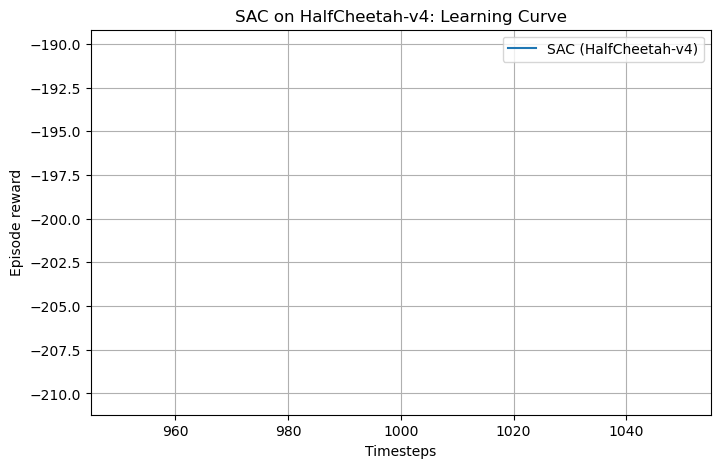

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(sac_logger.timesteps, sac_logger.episode_rewards, label="SAC (HalfCheetah-v4)")
plt.xlabel("Timesteps")
plt.ylabel("Episode reward")
plt.title("SAC on HalfCheetah-v4: Learning Curve")
plt.legend()
plt.grid(True)
plt.show()


Visualize

In [36]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

# env = gym.make("Pendulum-v1", render_mode="rgb_array")
env = gym.make("HalfCheetah-v4", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())
